In [11]:
import pandas as pd

In [33]:
df=pd.read_csv("assets/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [35]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [36]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [56]:
preprosesed_df=pd.get_dummies(df,columns=["Geography"],dtype=int)
preprosesed_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [58]:
preprosesed_df["Gender"]=preprosesed_df.Gender.map({"Female":1,"Male":0})
preprosesed_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [66]:
from sklearn.preprocessing import MinMaxScaler
col_to_tranform=["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]
scaller=MinMaxScaler()
preprosesed_df[col_to_tranform]=scaller.fit_transform(preprosesed_df[col_to_tranform])
preprosesed_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [68]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(preprosesed_df.drop(columns=["Exited"]),preprosesed_df["Exited"])

In [70]:
x_train.shape

(7500, 12)

In [72]:
y_train.shape

(7500,)

In [69]:
from tensorflow import keras

In [73]:
model = keras.Sequential([
   keras.layers.Dense(12, input_shape=(12,), activation='relu'),
   keras.layers.Dense(6, activation='relu'),
   keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

c:\Users\baps\OneDrive\Desktop\Projects\aiml\practice\aimlenv\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
model.fit(x_train,y_train,epochs=30)

Epoch 1/30


235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.8699 - loss: 0.3195
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.8641 - loss: 0.3250
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.8686 - loss: 0.3219
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.8699 - loss: 0.3245
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.8707 - loss: 0.3242
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.8721 - loss: 0.3138
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.8656 - loss: 0.3218
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.8699 - loss: 0.3206
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.8633 - loss: 0.3292
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.8669 - loss: 0.3196
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.8646 - loss: 0.3272
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [77]:
y_pred=model.predict(x_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [87]:
import numpy as np
y_pred=[1 if i>.5 else 0 for i in y_pred ]

In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1983
           1       0.72      0.46      0.56       517

    accuracy                           0.85      2500
   macro avg       0.80      0.71      0.74      2500
weighted avg       0.84      0.85      0.84      2500



Text(50.722222222222214, 0.5, 'predicted')

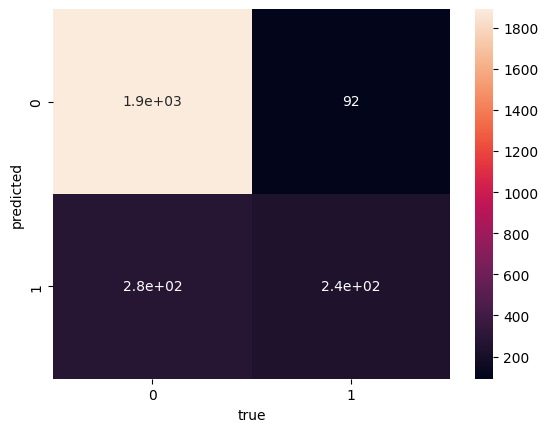

In [96]:
from matplotlib import pyplot as plt
from seaborn import heatmap
from sklearn.metrics import confusion_matrix


cm=confusion_matrix(y_test,y_pred)

heatmap(cm,annot=True)
plt.xlabel("true")
plt.ylabel("predicted")